# Fit Hologram parameters

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : February 14th 2021

# Imports

In [188]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

# constants

- all transverse physical coordinates are in mm and relative to beam optical center (at CCD center)

In [189]:
# conversion in good inits
u_radtodeg=180.0/np.pi
u_degtorad=np.pi/180.
u_mtomm=1e3

- all constants are refered as $c\_$

In [190]:
c_F=18*1.2*u_mtomm # Auxtel Focla length

In [191]:
c_Z1=200. # mm, distance between hologram and source plane during holo recording
c_Z0 =210. # mm, distance between hologram and CCD plane for observations 

In [192]:
c_d1=20 # mm, disntance between the sources during recording 

In [193]:
c_x1_0=-10  # mm , x-coordinates of the hologram optical center in the CCD ref frame
c_y1_0=5 # mm , y-coordinate of the hologram optical center in the CCD ref frame

In [194]:
c_alpha0=10 #degree , angle of rotation of hologram source axis wrt CCD  

# Functions

- $(X,Y)$ : coordinates in CCD frame with telecope optical center as the origin
- $(x,y)$ : coordinates in hologram frame with telecope optical center as the origin the same reference axis as the CCD
- $(x_1,y_1)$ : coordinates in hologram reference frame, with telecope optical center as the origin, such the two sources A $(x_1(A),y_1(A))$ and B $(x_1(B),y_1(B))$ have coordinates:
$$
x_1(A)= x_1 (0)-d_1/2 
$$
$$
y_1(A)= y_1(0)
$$
$$
x_1(B)= x_1 (0)+d_1/2 
$$
$$
y_1(B)= y_1(0)
$$

In [195]:
def XYtoxy(XY,Z):
    """
    XYtoxy(XY,Z): convert coordinates in CCD plane to coordinates in hologram frame (same ref axis as CCD)
    
    input parameters
    - XY : numpy array of the 2-coordinates in CCD in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - xy : numpy array of the 2-coordinates in  in mm
    """
    XY=np.array(XY)
    xy=(1-Z/c_F)*XY
    
    return xy  

In [196]:
def xytoXY(xy,Z):
    """
    xytoXY(xy,Z): convert coordinates in hologram frame (same ref axis as CCD) to CCD frame
    
     input parameters
    - xy : numpy array of the 2-coordinates in  in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - XY : numpy array of the 2-coordinates in CCD in mm
    
    """
    xy=np.array(xy)
    XY=1./(1-Z/c_F)*xy
    
    return XY  

In [197]:
def xytox1y1(xy,alpha):
    """
    xytox1y1(xy,alpha): convert coordinates in hologram frame (same ref axis as CCD) to an instrinsic hologram frame
    by an angle alpha (goal new axis should be x1 axis parallel to sources A,B)
    
    input parameters
    - xy : numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
    - alpha : angle in degree
    
    output parameter 
    - x1y1 : mm, numpy array of the 2-coordinates in the intrinsic hologram frame
    
    """
    
    cos_alpha=np.cos(alpha*u_degtorad)
    sin_alpha=np.sin(alpha*u_degtorad)
    x=xy[0]
    y=xy[1]
    
    x1y1=np.array([cos_alpha*x+sin_alpha*y,-sin_alpha*x+cos_alpha*y])
    return x1y1

In [198]:
def xytox1y1_2D(x,y,alpha):
    """
    xytox1y1_2d(x,y,alpha): convert coordinates in hologram frame (same ref axis as CCD) to an instrinsic hologram frame
    by an angle alpha (goal new axis should be x1 axis parallel to sources A,B)
    
    input parameters
    - x,y : 2D-numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
    - alpha : angle in degree
    
    output parameter 
    - x1,y1 : mm, 2D-numpy array of the 2-coordinates in the intrinsic hologram frame
    
    """
    
    cos_alpha=np.cos(alpha*u_degtorad)
    sin_alpha=np.sin(alpha*u_degtorad)
    
    x1=cos_alpha*x+sin_alpha*y
    y1=-sin_alpha*x+cos_alpha*y
    return x1,y1

In [199]:
def x1y1toxy(x1y1,alpha):
    """
    x1y1toxy(x1y1,alpha): convert coordinates in the intrinsic hologram frame  to the hologram frame 
    with same axis as CCD
    by an angle alpha 
    
    input parameters
    - x1y1 : mm, numpy array of the 2-coordinates in the intrinsic hologram frame  
    - alpha : angle in degree
    
    output parameter 
     - xy : numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
   
    
    """
    
    cos_alpha=np.cos(alpha*u_degtorad)
    sin_alpha=np.sin(alpha*u_degtorad)
    
    x1=x1y1[0]
    y1=x1y1[1]
    
    xy=np.array([cos_alpha*x1-sin_alpha*y1,sin_alpha*x1+cos_alpha*y1])
    return xy

In [200]:
def x1y1toxy_2D(x1,y1,alpha):
    """
    x1y1toxy_2D(x1,y1,alpha): convert coordinates in the intrinsic hologram frame  to the hologram frame 
    with same axis as CCD
    by an angle alpha 
    
    input parameters
    - x1,y1 : mm, 2D numpy array of the 2-coordinates in the intrinsic hologram frame  
    - alpha : angle in degree
    
    output parameter 
     - x,y : 2D numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
   
    
    """
    
    cos_alpha=np.cos(alpha*u_degtorad)
    sin_alpha=np.sin(alpha*u_degtorad)
    
    
    x=cos_alpha*x1-sin_alpha*y1
    y=sin_alpha*x1+cos_alpha*y1
    return x,y

In [201]:
def dist1_to_source(xy,xy_s):
    """
    dist1_to_source(xy,xy_s) : distance between a point M(x,y) to a source S(x_S,y_s) at hologram recording phase
    
    The alpha hologram rotation angle is not important provided both point M and source S have the same reference axis
    
     input parameters
    - xy   : mm, 1D-numpy array of the 2-coordinates of point M in the  hologram frame  
    - xy_s : mm, 1D-numpy array of the 2-coordinates of the source in the  hologram frame  
    
    
    output parameter:
    return the 3d distance 
    
    """
    
    return np.sqrt(c_Z1**2+ (xy[0]-xy_s[0])**2+ (xy[1]-xy_s[1])**2)

In [202]:
def ddist1_to_source(x,y,x_s,y_s):
    """
    ddist1_to_source(xy,xy_s) : distance between a point M(x,y) to a source S(x_S,y_s) at hologram recording phase
    
    more efficient than dist1_to_source(xy,xy_s) because x,y are 2D numpy arrays.
    
    The alpha hologram rotation angle is not important provided both point M and source S have the same reference axis
    
     input parameters
    - x,y   : mm, 2D-numpy array of the 2-coordinates of point M in the  hologram frame  
    - x,y_s : mm, scalar the 2-coordinates of the source in the  hologram frame  
    
    
    output parameter:
    return the distance in 3D in a 2D numpy array
    
    """
    
    return np.sqrt(c_Z1**2 + (x-x_s)**2+ (y-y_s)**2)

In [203]:
def d_alpha(x1y1,x1y1_0):
    """
    d_alpha(x1y1,x1y1_0) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    
    input parameters
    - x1y1   : mm, numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
    - x1y1_0 : mm, numpy array of the 2-coordinates of the hologram optical center in the hologram instrinsic frame  
    
    
    output parameter:
    return the angle d_alpha in degree
    
    """
    
    
    x1y1_A=x1y1_0+np.array([-c_d1/2, 0]) # coordinate of source A
    x1y1_B=x1y1_0+np.array([+c_d1/2, 0]) # coordinate of source B
    
    d1_A=dist1_to_source(x1y1,x1y1_A)  # distance to source A
    d1_B=dist1_to_source(x1y1,x1y1_B)  # distance to source B
    
    
    num_tan_dalpha= d1_B*(x1y1[1]-x1y1_A[1])-d1_A*(x1y1[1]-x1y1_B[1])
    den_tan_dalpha= d1_B*(x1y1[0]-x1y1_A[0])-d1_A*(x1y1[0]-x1y1_B[0])
    
    tan_dalpha=- num_tan_dalpha/den_tan_dalpha
    
    d_alpha=u_radtodeg*np.arctan(tan_dalpha)
    
    return d_alpha

In [204]:
def dd_alpha(x1,y1,x1_0,y1_0):
    """
    dd_alpha(x1,y1,x1_0,y1_0) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    more efficient than d_alpha(x1y1,x1y1_0) because x1,y1 are a 2D numpy array
    
    input parameters are 2D numpy array
    - x1,y1   : mm, 2D numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
    - x1_0,y1_0 : mm, scalars of the 2-coordinates of the hologram optical center in the hologram instrinsic frame  
    
    
    output parameter:
    return the angle d_alpha in degree in a 2D numpy array
    
    """
    
    
    x1_A=x1_0-c_d1/2 # coordinate of source A
    y1_A=y1_0        # coordinate of source A
    
    x1_B=x1_0+c_d1/2 # coordinate of source B
    y1_B=y1_0        # coordinate of source B
    
    dd1_A=ddist1_to_source(x1,y1,x1_A,y1_A)  # distance to source A in a 2D numpy array
    dd1_B=ddist1_to_source(x1,y1,x1_B,y1_B)  # distance to source B
    
    
    num_tan_dalpha= dd1_B*(y1-y1_A)-dd1_A*(y1-y1_B)
    den_tan_dalpha= dd1_B*(x1-x1_A)-dd1_A*(x1-x1_B)
    
    tan_dalpha=- num_tan_dalpha/den_tan_dalpha
    
    d_alpha=u_radtodeg*np.arctan(tan_dalpha)
    
    return d_alpha # in a 2D numpy array

# Check formula

In [205]:
XMIN=-40
XMAX=40
YMIN=-40
YMAX=40
NPIX=1000

In [206]:
X = np.linspace(XMIN, XMAX, NPIX)
Y = np.linspace(YMIN, YMAX, NPIX)
XX, YY = np.meshgrid(X, Y, sparse=False)

In [207]:
Z_Ang_holo=dd_alpha(XX,YY,c_x1_0,c_y1_0)

In [208]:
X_ccd = np.linspace(XMIN, XMAX, NPIX)
Y_ccd = np.linspace(YMIN, YMAX, NPIX)
XX_ccd, YY_ccd = np.meshgrid(X_ccd, Y_ccd, sparse=False)

# homothecy
zoom=1.5
xx_holo=XYtoxy(XX_ccd,c_Z1*zoom) 
yy_holo=XYtoxy(YY_ccd,c_Z1*zoom) 

# rotation
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,c_alpha0)
Z_Ang_ccd=dd_alpha(xx1_holo,yy1_holo,c_x1_0,c_y1_0)

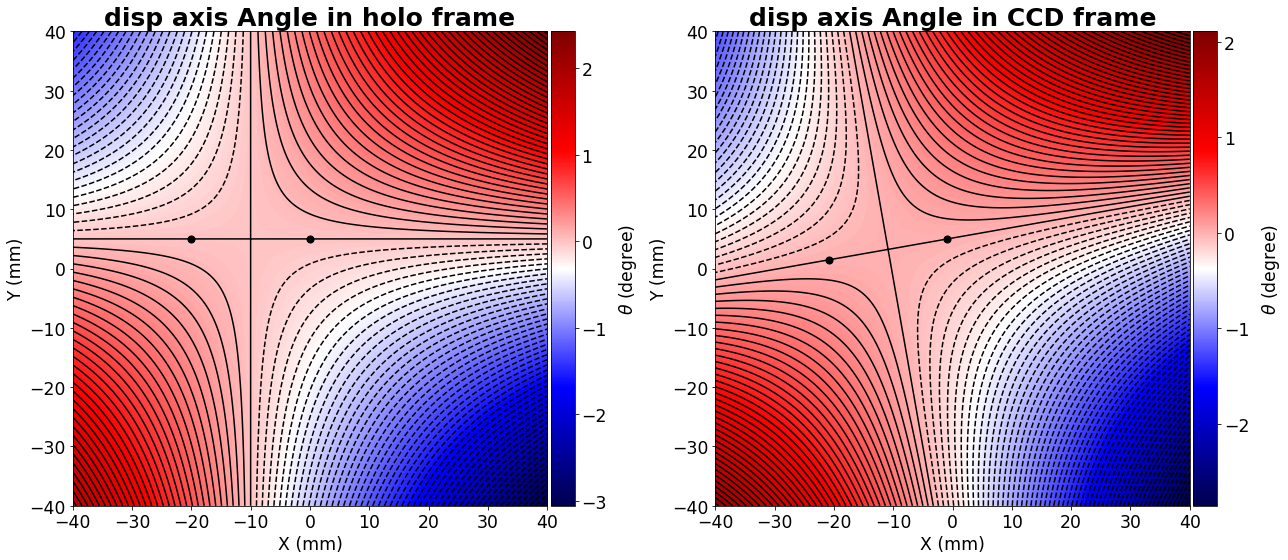

In [209]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Ang_holo,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Ang_holo,levels=100,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

xy1_A=np.array([c_x1_0-c_d1/2,c_y1_0])
xy1_B=np.array([c_x1_0+c_d1/2,c_y1_0])

ax1.scatter(xy1_A[0],xy1_A[1],marker="o",color="k",s=50)
ax1.scatter(xy1_B[0],xy1_B[1],marker="o",color="k",s=50)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("disp axis Angle in holo frame",fontweight="bold",fontsize=25)


ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)


im2=ax2.imshow(Z_Ang_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h2 = ax2.contour(X_ccd,Y_ccd,Z_Ang_ccd,levels=100,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

xy_A = x1y1toxy(xy1_A,c_alpha0)
xy_B = x1y1toxy(xy1_B,c_alpha0)


XY_A = xytoXY(xy_A,c_Z1*zoom)
XY_B = xytoXY(xy_B,c_Z1*zoom)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=50)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=50)


ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("disp axis Angle in CCD frame",fontweight="bold",fontsize=25)


plt.tight_layout()